In [33]:
%pip install wordcloud
%pip install seaborn
%pip install matplotlib
%pip install numpy
%pip install pandas

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [34]:
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import string
import re
from collections import Counter

#đọc file
df = pd.read_csv("./test_English/dataset_en/Amazon_Product_Review_full_en_cleaned.csv", sep=';', dtype=str)
# Xác định cột chứa nội dung review: ưu tiên 'review_body', sau đó 'review_headline'
if 'review_body' in df.columns:
    review_col = 'review_body'
elif 'review_headline' in df.columns:
    review_col = 'review_headline'
else:
    raise Exception("Không tìm thấy cột review (expected 'review_body', 'review_headline')")



In [35]:
print("=== Thông tin dataset ===")
df.info()

=== Thông tin dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10132 entries, 0 to 10131
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        10132 non-null  object
 1   customer_id        10132 non-null  object
 2   review_id          10132 non-null  object
 3   product_id         10132 non-null  object
 4   product_parent     10132 non-null  object
 5   product_title      10132 non-null  object
 6   product_category   10132 non-null  object
 7   star_rating        10132 non-null  object
 8   helpful_votes      10132 non-null  object
 9   total_votes        10132 non-null  object
 10  vine               10132 non-null  object
 11  verified_purchase  10132 non-null  object
 12  review_headline    10132 non-null  object
 13  review_body        10132 non-null  object
 14  review_date        10132 non-null  object
 15  sentiment          10132 non-null  object
dtypes: object(16)


In [36]:
#Kiểm tra dữ liệu trùng lặp
duplicates = df.duplicated().sum()
print(f"\nSố dòng dữ liệu trùng lặp: {duplicates}")


Số dòng dữ liệu trùng lặp: 0


In [37]:
# Kiểm tra số lượng giá trị null theo từng cột
print("\nSố lượng giá trị null theo cột:")
print(df.isnull().sum())


Số lượng giá trị null theo cột:
marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
sentiment            0
dtype: int64


Các cột được chọn để vẽ heatmap: ['star_rating', 'helpful_votes', 'total_votes']


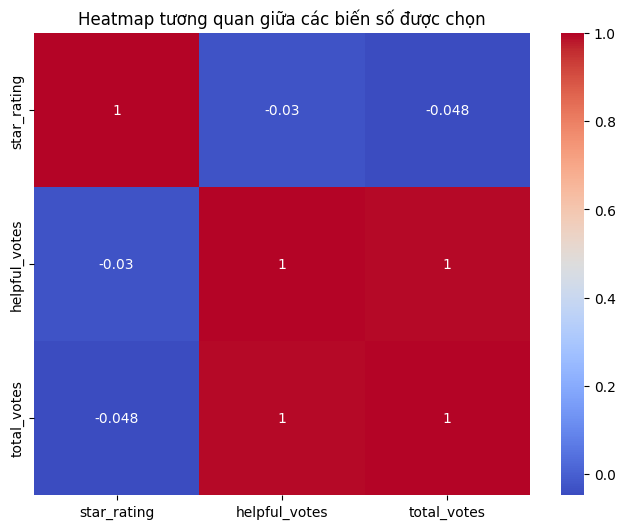

In [38]:
import numpy as np

cols_to_numeric = ['star_rating', 'helpful_votes', 'total_votes']  # sửa lại 'sentiment' nếu đúng tên cột
# Chuyển các cột này về kiểu số nếu có trong DataFrame
for col in cols_to_numeric:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Lọc ra đúng các cột có trong DataFrame và là số
selected_cols = [col for col in cols_to_numeric if col in df.columns]
print("Các cột được chọn để vẽ heatmap:", selected_cols)

if selected_cols:
    plt.figure(figsize=(8,6))
    corr = df[selected_cols].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title("Heatmap tương quan giữa các biến số được chọn")
    plt.show()
else:
    print("Không có cột số nào để vẽ heatmap.")

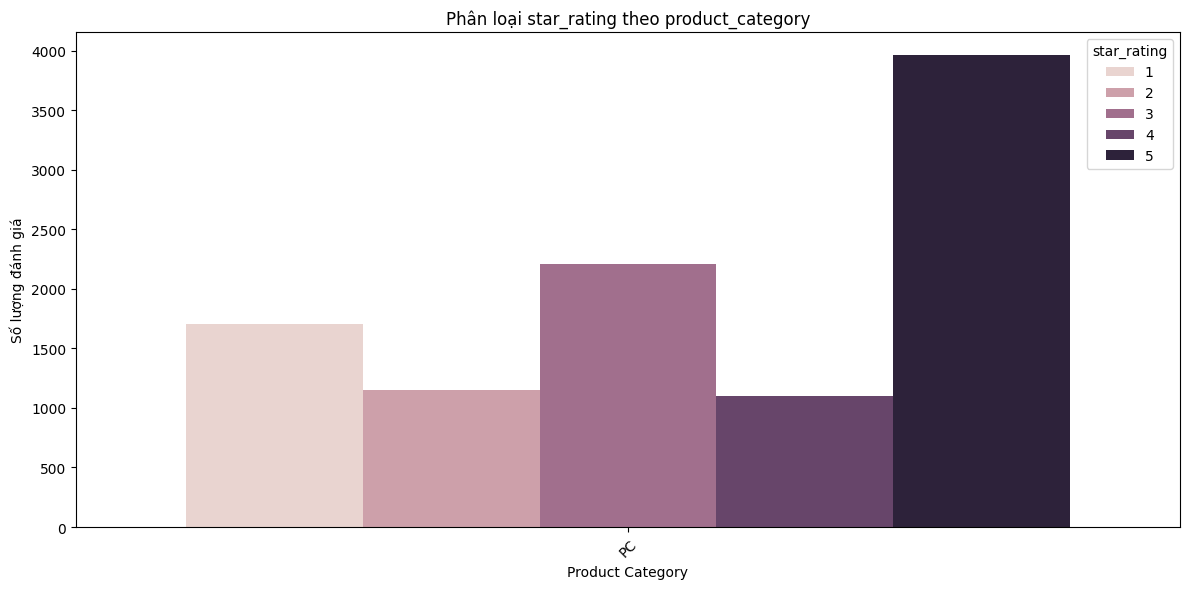

In [39]:
# 1. Phân loại star_rating theo product_category
# -------------------------------

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='product_category', hue='star_rating')
plt.title('Phân loại star_rating theo product_category')
plt.xlabel('Product Category')
plt.ylabel('Số lượng đánh giá')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\NCPC\AppData\Local\Temp\ipykernel_23632\2769464641.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='star_rating', data=df, palette='viridis')


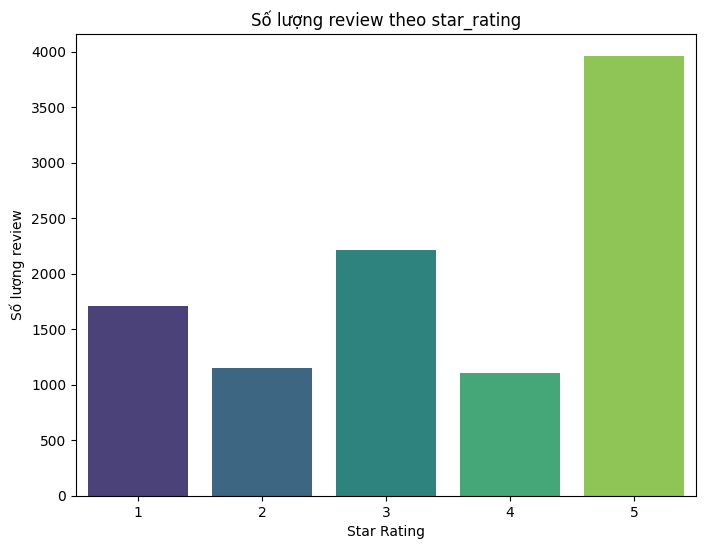

In [41]:
# 1. Phân tích mối quan hệ giữa star_rating và review_body
# Biểu đồ đếm số lượng review theo từng star_rating
plt.figure(figsize=(8, 6))
sns.countplot(x='star_rating', data=df, palette='viridis')
plt.title('Số lượng review theo star_rating')
plt.xlabel('Star Rating')
plt.ylabel('Số lượng review')
plt.show()

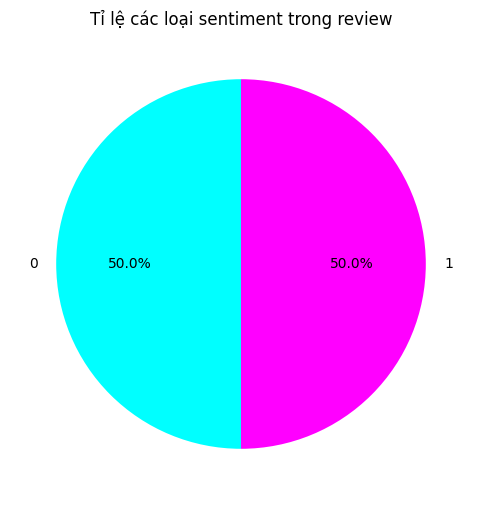

In [42]:
plt.figure(figsize=(6,6))
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='cool')
plt.title("Tỉ lệ các loại sentiment trong review")
plt.ylabel("")
plt.show()

C:\Users\NCPC\AppData\Local\Temp\ipykernel_23632\386421398.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), ax=axes[i], palette="cool")
C:\Users\NCPC\AppData\Local\Temp\ipykernel_23632\386421398.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), ax=axes[i], palette="cool")


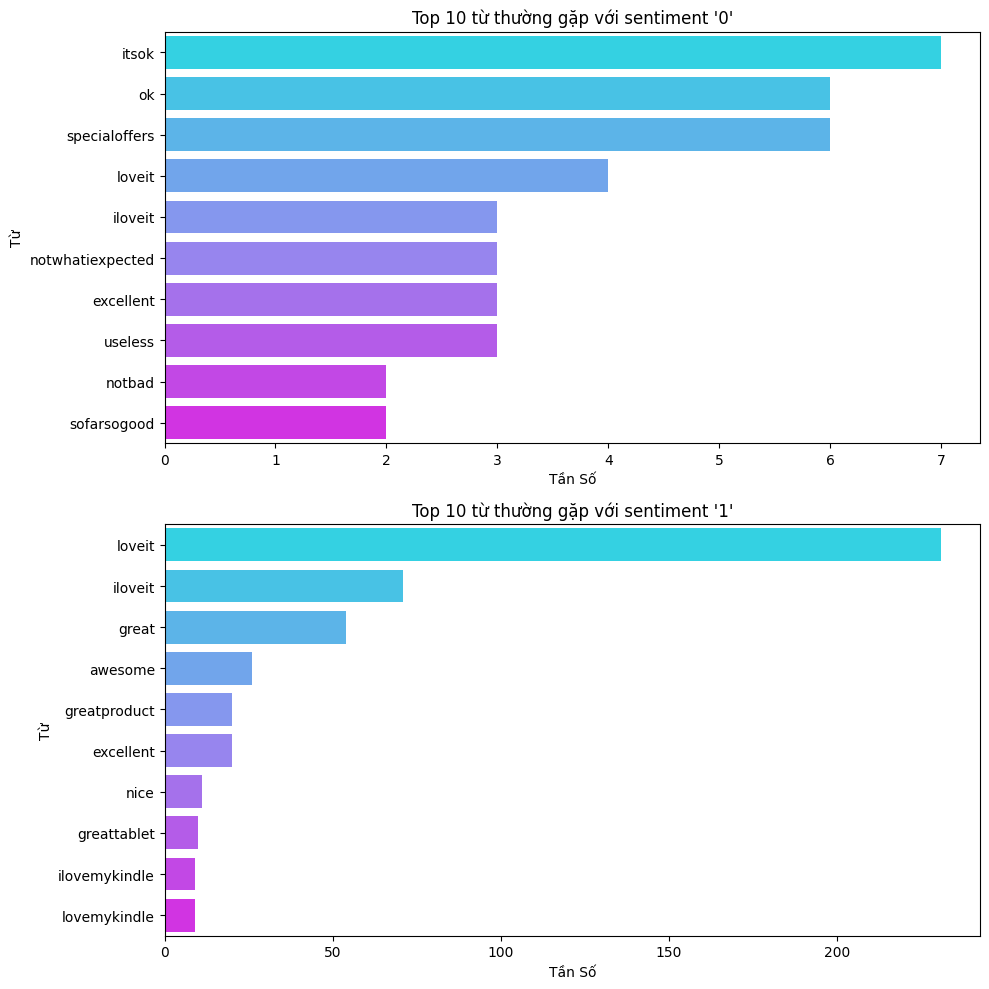

In [43]:
import re
import string
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Danh sách stopwords cơ bản (bạn có thể mở rộng danh sách này nếu cần)
default_stopwords = set(["the", "and", "a", "an", "in", "of", "to", "is", "it", "that", "for", "with", "on", "this"])

# Hàm tokenize: chuyển văn bản về chữ thường, loại bỏ dấu câu và stopwords
def tokenize(text):
    text = str(text).lower()  # chuyển về chữ thường
    text = re.sub(f"[{re.escape(string.punctuation)}]", " ", text)  # loại bỏ dấu câu
    tokens = text.split()
    tokens = [t for t in tokens if t not in default_stopwords]  # loại bỏ stopwords
    return tokens

# Lấy danh sách các sentiment có trong dữ liệu
sentiments = sorted(df["sentiment"].dropna().unique())
word_freq_dict = {}

for s in sentiments:
    # Lấy các review tương ứng với sentiment s
    texts = df[df['sentiment'] == s]["review_body"].dropna().tolist()
    all_tokens = []
    for text in texts:
        all_tokens.extend(tokenize(text))
    # Đếm tần suất từ
    counter = Counter(all_tokens)
    common_words = counter.most_common(10)  # Lấy 10 từ xuất hiện nhiều nhất
    word_freq_dict[s] = common_words

# Vẽ biểu đồ cho từng loại sentiment
num_sentiments = len(sentiments)
fig, axes = plt.subplots(num_sentiments, 1, figsize=(10, 5 * num_sentiments))
if num_sentiments == 1:
    axes = [axes]

for i, s in enumerate(sentiments):
    if word_freq_dict[s]:
        words, counts = zip(*word_freq_dict[s])
    else:
        words, counts = ([], [])
    sns.barplot(x=list(counts), y=list(words), ax=axes[i], palette="cool")
    axes[i].set_title(f"Top 10 từ thường gặp với sentiment '{s}'")
    axes[i].set_xlabel("Tần Số")
    axes[i].set_ylabel("Từ")

plt.tight_layout()
plt.show()